Rainfall Prediction is the application of science and technology to predict the amount of rainfall over a region. 
The dataset used for this purpose is the 'average rainfall in UK(2010-2019)'. This dataset was imported from kaggle.

## Importing dataset

The dataset consists of average rainfall in millimeters by year,month and season.

In [1]:
import requests
import pandas as pd
import numpy as np

data = pd.read_csv('avg_rainfall.csv')

In [2]:
data

,Year,Type of period,Period,Avg rainfall(in mm)
0,2010,Monthly,JAN,69.5
1,2010,Monthly,FEB,71.7
2,2010,Monthly,MAR,65.1
3,2010,Monthly,APR,21.4
4,2010,Monthly,MAY,22.1
...,...,...,...,...
165,2019,Season,Winter,130.4
166,2019,Season,Spring,162.1
167,2019,Season,Summer,279.0
168,2019,Season,Autumn,344.4


In [3]:
data.info() #info() shows the type of data present and among them how much data is null/non-null.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 170 non-null    int64  
 1   Type of period       170 non-null    object 
 2   Period               170 non-null    object 
 3   Avg rainfall(in mm)  170 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.4+ KB


In [4]:
data.describe() 

,Year,Avg rainfall(in mm)
count,170.000000,170.000000
mean,2014.500000,140.540588
std,2.880767,179.608045
min,2010.000000,10.300000
25%,2012.000000,52.625000
50%,2014.500000,78.800000
75%,2017.000000,147.900000
max,2019.000000,1043.000000


In [7]:
X= data.iloc[:,0:3]
Y= data.iloc[:,-1]

Converting X and Y to numpy arrays for further processing

In [8]:
X=np.array(X)
Y=np.array(Y)

## Preprocessing the data using labelencoder

Labelencoder converts the categorical data into numeric types to normalize the data.

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:,1] = labelencoder.fit_transform(X[:,1])
X[:,2] = labelencoder.fit_transform(X[:,2])

## Splitting the dataset for training and testing

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3,random_state = 10)

## Model Training

We have used the 'Random Forest Model' for the purpose of prediction. The random forest uses multiple decision trees and chooses the optimum result by selecting the majority. 

In [12]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(n_estimators=800,random_state=0)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=800, random_state=0)

In [13]:
y_train_predict=random_forest_model.predict(X_train)
y_test_predict=random_forest_model.predict(X_test)

## Plotting predicted vs actual values

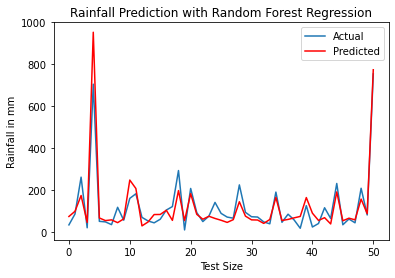

In [14]:
import matplotlib.pyplot as plt

plt.plot(y_test,label='Actual')
plt.plot(y_test_predict,label='Predicted',color='red')
plt.legend()
plt.xlabel('Test Size')
plt.ylabel('Rainfall in mm')
plt.title('Rainfall Prediction with Random Forest Regression')
plt.show()

## Metrics and Accuracy

Mean Absolute Error, Mean Squared Error and Root Mean Squared Error are the performance metrics that we have used to analyze our model.

In [16]:
from sklearn import metrics

print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 34.92074509803927
MSE: 2748.310146544118
RMSE: 52.424327812038925

-------Train Data--------
MAE: 15.566118697478712
MSE: 521.1404569869912
RMSE: 22.828500979849537


In [17]:
print("Training Accuracy")
print(round(random_forest_model.score(X_train,y_train),3)*100)
print("Testing Accuracy")
print(round(random_forest_model.score(X_test,y_test),3)*100)

Training Accuracy
98.6
Testing Accuracy
86.0


## Predicting an input

To predict the rainfall we give an input of the year, peroid and month in numeric form.

In [18]:
predicted = random_forest_model.predict([[2020,1,5]])
predicted

array([42.991875])